In [2]:
import numpy as np # math functions
import scipy # scientific functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
import scipy.constants as spc
from scipy.stats import linregress # contains linregress (for linear regression)
from scipy.optimize import curve_fit as cfit # non-linear curve fitting
from sklearn.metrics import r2_score # import function that calculates R^2 score 

Potential:

In [3]:
C = 1
a = 1
L = 3
N = 100
coord = np.linspace(-L, L , N) # defines coordinates
coord_x, coord_y = np.meshgrid(coord, coord) 
print("coord = ", coord)
print("coord_x = ",coord_x)
print("coord_y = ",coord_y)

coord =  [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.9090

In [12]:
def potential(x, y, a, C):
    b = np.sqrt((x+a)**2+y**2)
    neg_b = np.sqrt((x-a)**2+y**2)
    V = -C*np.log(neg_b/a) +C*np.log(b/a)
    return V

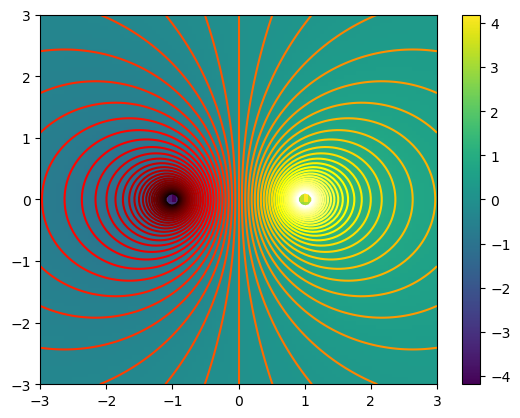

In [13]:
V_xy = potential(coord_x, coord_y, a, C)
plt.figure()
plt.pcolormesh(coord_x, coord_y, V_xy)
plt.colorbar()
# plt.contour(coord_x, coord_y, V_xy, np.sort([-1 , 0 , 1]), cmap='hot')
plt.contour(coord_x, coord_y, V_xy, np.sort([0.1*i for i in range(-30,30)]), cmap='hot')

The parameter cmap simply chooses the set of colors which will be used to show the magnitude of the potential

/tmp/ipykernel_4701/1509013266.py:4: RuntimeWarning: divide by zero encountered in log
  V = -C*np.log(neg_b/a) +C*np.log(b/a)


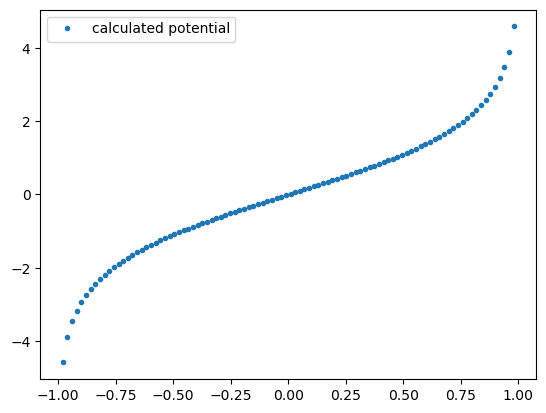

In [14]:
x= np.linspace(-1,1,N)
y = np.zeros(N)

V_x = np.array([potential(x_i, 0, a, C) for x_i in x])

plt.plot(x,V_x, '.')

plt.legend(["calculated potential"])

Capacitor:

In [15]:
eps0 = spc.epsilon_0 # F/m
D = 18e-2 # m
d = 0.5e-3 # m

In [16]:
C_data = pd.read_csv('capacitor.csv')
C_data = C_data.rename(columns = {"time (sec)":"t", "ch2":"V_R"})
C_data["V_C"] = C_data["ch1"] - C_data["V_R"]
print(C_data)

            t       ch1       V_R       V_C
0    0.000000  3.858477 -0.081709  3.940186
1    0.000000  3.793352 -0.080584  3.873936
2    0.000001  3.706517 -0.080584  3.787101
3    0.000001  3.641392 -0.081146  3.722538
4    0.000002  3.576266 -0.080021  3.656287
..        ...       ...       ...       ...
415  0.000166 -0.049060  0.000462 -0.049522
416  0.000166 -0.049060  0.001587 -0.050647
417  0.000167 -0.049060  0.002150 -0.051210
418  0.000167 -0.070769 -0.000101 -0.070668
419  0.000168 -0.049060 -0.000664 -0.048396

[420 rows x 4 columns]


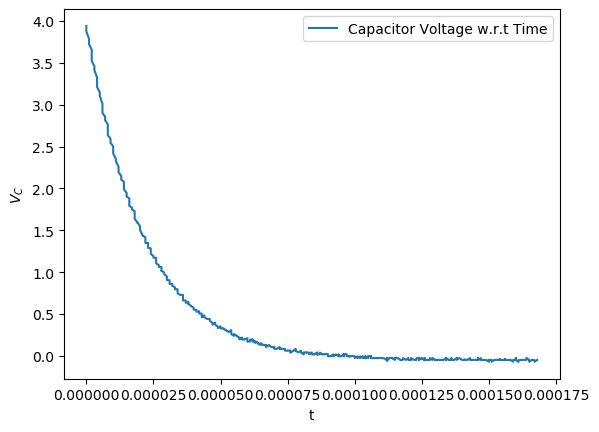

In [17]:
plt.plot(C_data["t"], C_data["V_C"])
plt.legend(["Capacitor Voltage w.r.t Time"])
plt.xlabel("t"), plt.ylabel("$V_{C}$")

t = np.array(C_data['t'].values)
V_C = np.array(C_data['V_C'].values)

Curve fitting is the process of constructing a curve that is required to best fit a series of datapoints, and possibly some other constraints (e.g: must be linear)

In [18]:
def V_decay(t,tau,V0):
    return V0*np.exp(-t/tau)

p_optimal, p_covariance = cfit(V_decay,C_data['t'], C_data["V_C"], p0=[2e-5,4])
print(p_optimal)
print(p_covariance)

std = np.sqrt(np.diag(p_covariance))
print(std)

[2.04370871e-05 3.98566190e+00]
[[ 6.43936085e-15 -6.14294640e-10]
 [-6.14294640e-10  1.19951604e-04]]
[8.02456282e-08 1.09522419e-02]


Note: cfit takes in a theoretical curve equation and datapoints, and returns the values of the coefficients of the equation (in our case: $\tau$ and $V_{0}$) which best fit our datapoints, as well as the covarience (a measure of the accuracy of the fit)

Initially, I did not include initial guesses for the values of $\tau_{fit}$ and $V_{0,fit}$, which resulted in a very inaccurate fit (gave back a straight line). After adding initial guesses of $\tau_{fit} = 2\cdot10^{-5}$ and $V_{0,fit} = 4$, the fitted curve matched very closely to the original datapoints.

In our case, we find:

$\tau_{fit} = 2.04370871\cdot10^{-5}$

$V_{0,fit} = 3.98566190$

p_covariance gives the variance of the coefficient estimates. We find:

$Cov_{\tau_{fit}} = [ 6.43936085\cdot10^{-15}, -6.14294640\cdot10^{-10}]$

$Cov_{V_{0,fit}} = [-6.14294640\cdot10^{-10},  1.19951604\cdot10^{-4}]$

Using the covariance, we can calculate the standard deviation to measure the error:

$\sigma_{V_{0,fit}} = 8.0245628210\cdot10^{-8}$

$\sigma_{\tau_{fit}} = 1.09522419\cdot10^{-2}$







(Text(0.5, 0, 't'), Text(0, 0.5, '$V_{C}$'))

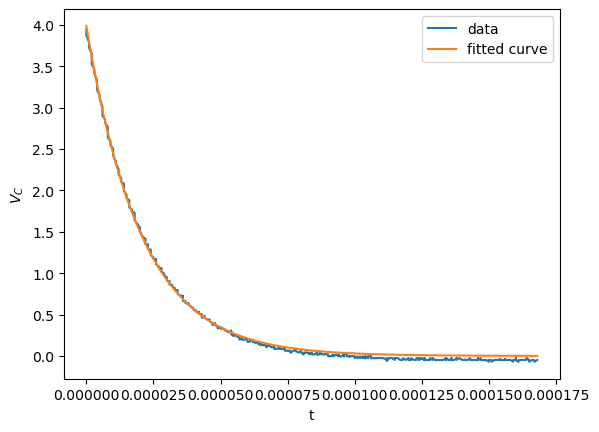

In [11]:
plt.plot(C_data["t"], C_data["V_C"])
plt.plot(C_data['t'], V_decay(C_data['t'],p_optimal[0],p_optimal[1]))
plt.legend(["data", "fitted curve"])
plt.xlabel("t"), plt.ylabel("$V_{C}$")

In [25]:
chi2 = sum([((C_data["V_C"][i]-V_decay(C_data['t'][i],p_optimal[0],p_optimal[1]))/0.05)**2 for i in range(len(C_data["V_C"]))])
print(chi2)

267.51057402488107


In [26]:
dof = len(C_data["V_C"])-2
print(dof)

418


In [29]:
scipy.stats.chi2.cdf(chi2, dof)

1.1003000354094708e-09

In [30]:
r2_score(C_data["V_C"], V_decay(C_data['t'],p_optimal[0],p_optimal[1]))

0.9979397074079406

We find an $r^2$ score of ~0.998. This makes sense when we visually compare the 2 plots, where it is clear the fitted curve closely matches the data-points

Text(0, 0.5, '$log(V_{c})$')

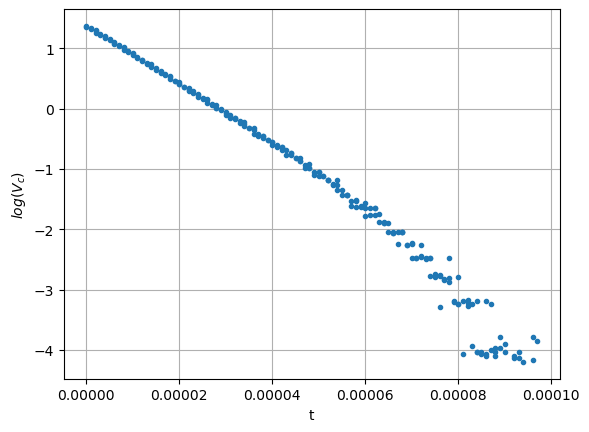

In [36]:
plt.plot(C_data["t"], np.log(C_data["V_C"]), ".")
plt.grid()
plt.xlabel("t")
plt.ylabel("$log(V_{c})$")

After plotting the graph above, we see a clear linear range from $t = (0,0.00005) [s]$

/usr/lib/python3/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


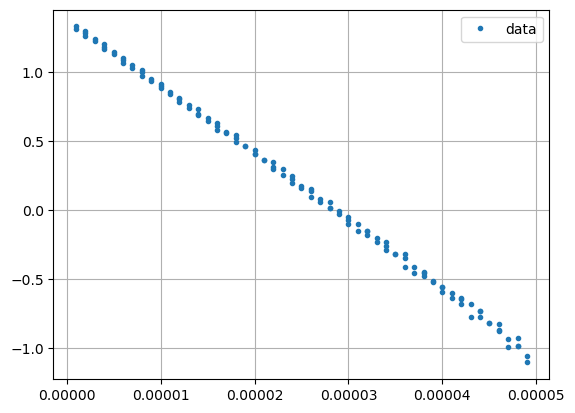

In [39]:
t1,t2 = 0, 0.00005
inds = (C_data['t'] > t1) & (C_data['t'] < t2)
plt.plot(C_data['t'][inds], np.log(C_data["V_C"])[inds],'.', label="data")
plt.legend()
plt.grid()

Linear regression is shmer shmer shmer

In [40]:
reg = linregress(C_data['t'][inds], np.log(C_data["V_C"])[inds])
print(reg)

LinregressResult(slope=-48897.61873817055, intercept=1.3893945941307775, rvalue=-0.9994032478444723, pvalue=2.906451219469254e-177, stderr=154.27783129014054)
